In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, text

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect = True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [9]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
most_recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
most_recent_date

('2017-08-23',)

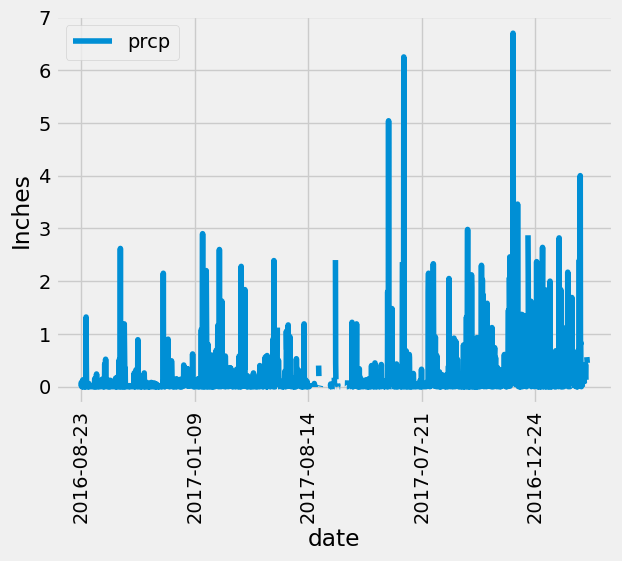

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
from datetime import timedelta
# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days = 365)

# Perform a query to retrieve the data and precipitation scores
year_data = session.query(measurement.date, measurement.prcp).filter(measurement.date >= year_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(year_data, columns = ['date', 'prcp'])

# Sort the dataframe by date
df.sort_values(by="date")

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(x = 'date', y = 'prcp', rot = 90)
plt.ylabel("Inches")
# plt.tight_layout()
plt.show()

In [13]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(station.station)).all()

[(9,)]

In [15]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(measurement.station, func.count(measurement.station))\
    .group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).filter(measurement.station == "USC00519281").all()

[(54.0, 85.0, 71.66378066378067)]

In [37]:
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days = 365)
year_data = session.query(measurement.date, measurement.prcp).filter(measurement.date >= year_ago).all()

last_yr_data = []
    
for date, prcp in year_data:
    results = {}
    results["date"] = date
    results["prcp"] = prcp
    last_yr_data.append(results)
    
last_yr_data

[{'date': '2016-08-23', 'prcp': 0.0},
 {'date': '2016-08-24', 'prcp': 0.08},
 {'date': '2016-08-25', 'prcp': 0.08},
 {'date': '2016-08-26', 'prcp': 0.0},
 {'date': '2016-08-27', 'prcp': 0.0},
 {'date': '2016-08-28', 'prcp': 0.01},
 {'date': '2016-08-29', 'prcp': 0.0},
 {'date': '2016-08-30', 'prcp': 0.0},
 {'date': '2016-08-31', 'prcp': 0.13},
 {'date': '2016-09-01', 'prcp': 0.0},
 {'date': '2016-09-02', 'prcp': 0.0},
 {'date': '2016-09-03', 'prcp': 0.0},
 {'date': '2016-09-04', 'prcp': 0.03},
 {'date': '2016-09-05', 'prcp': None},
 {'date': '2016-09-06', 'prcp': None},
 {'date': '2016-09-07', 'prcp': 0.05},
 {'date': '2016-09-08', 'prcp': 0.0},
 {'date': '2016-09-09', 'prcp': 0.03},
 {'date': '2016-09-10', 'prcp': 0.0},
 {'date': '2016-09-11', 'prcp': 0.05},
 {'date': '2016-09-12', 'prcp': 0.0},
 {'date': '2016-09-13', 'prcp': 0.02},
 {'date': '2016-09-14', 'prcp': 1.32},
 {'date': '2016-09-15', 'prcp': 0.42},
 {'date': '2016-09-16', 'prcp': 0.06},
 {'date': '2016-09-17', 'prcp': 0.05

In [48]:
start_date = dt.date(2017, 8, 10)

start_range_tobs = session.query(func.min(measurement.tobs), func.avg(measurement.tobs),\
                                 func.max(measurement.tobs)).filter(measurement.date >= start_date)

for date in start_range_tobs:
    print(date)

(70.0, 78.71428571428571, 85.0)


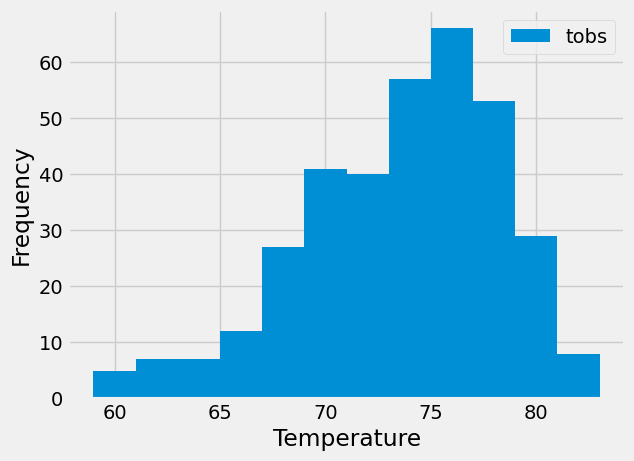

In [17]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
data = session.query(measurement.tobs).filter(measurement.station == "USC00519281").filter(measurement.date >= year_ago).all()
data

df = pd.DataFrame(data, columns = ['tobs'])
df.plot.hist(bins=12)
plt.xlabel("Temperature")
plt.show()

# Close Session

In [86]:
# Close Session
session.close()